# Practica 1
# Parte A: Análisis y procesamiento de un dataset

## 1

In [2]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
df = pd.read_csv('titanic.csv')
df_cleaned = df.dropna().drop_duplicates()
df_cleaned.reset_index(drop=True, inplace=True)
filas_eliminadas = len(df) - len(df_cleaned)
print(f'Filas eliminadas: {filas_eliminadas}')

Filas eliminadas: 708


## 2


In [3]:
# 2. Determinar atributos no útiles
atributos_no_utiles = ['Ticket', 'PassengerId', 'Cabin', 'Name']

-PassengerId: Es un identificador único para cada pasajero y no aporta información predictiva ni descriptiva relevante, ya que solo sirve para indexar.

-Name: Aunque contiene información como títulos (e.g., "Mr.", "Mrs."), en su forma completa es texto único por pasajero y no es directamente útil sin procesamiento adicional.

-Ticket: El código del billete varía mucho y no parece tener un patrón claro relacionado con otras variables.

-Cabin: Tiene muchos valores nulos (por eso se eliminaron tantas filas), lo que lo hace poco práctico.

## 3

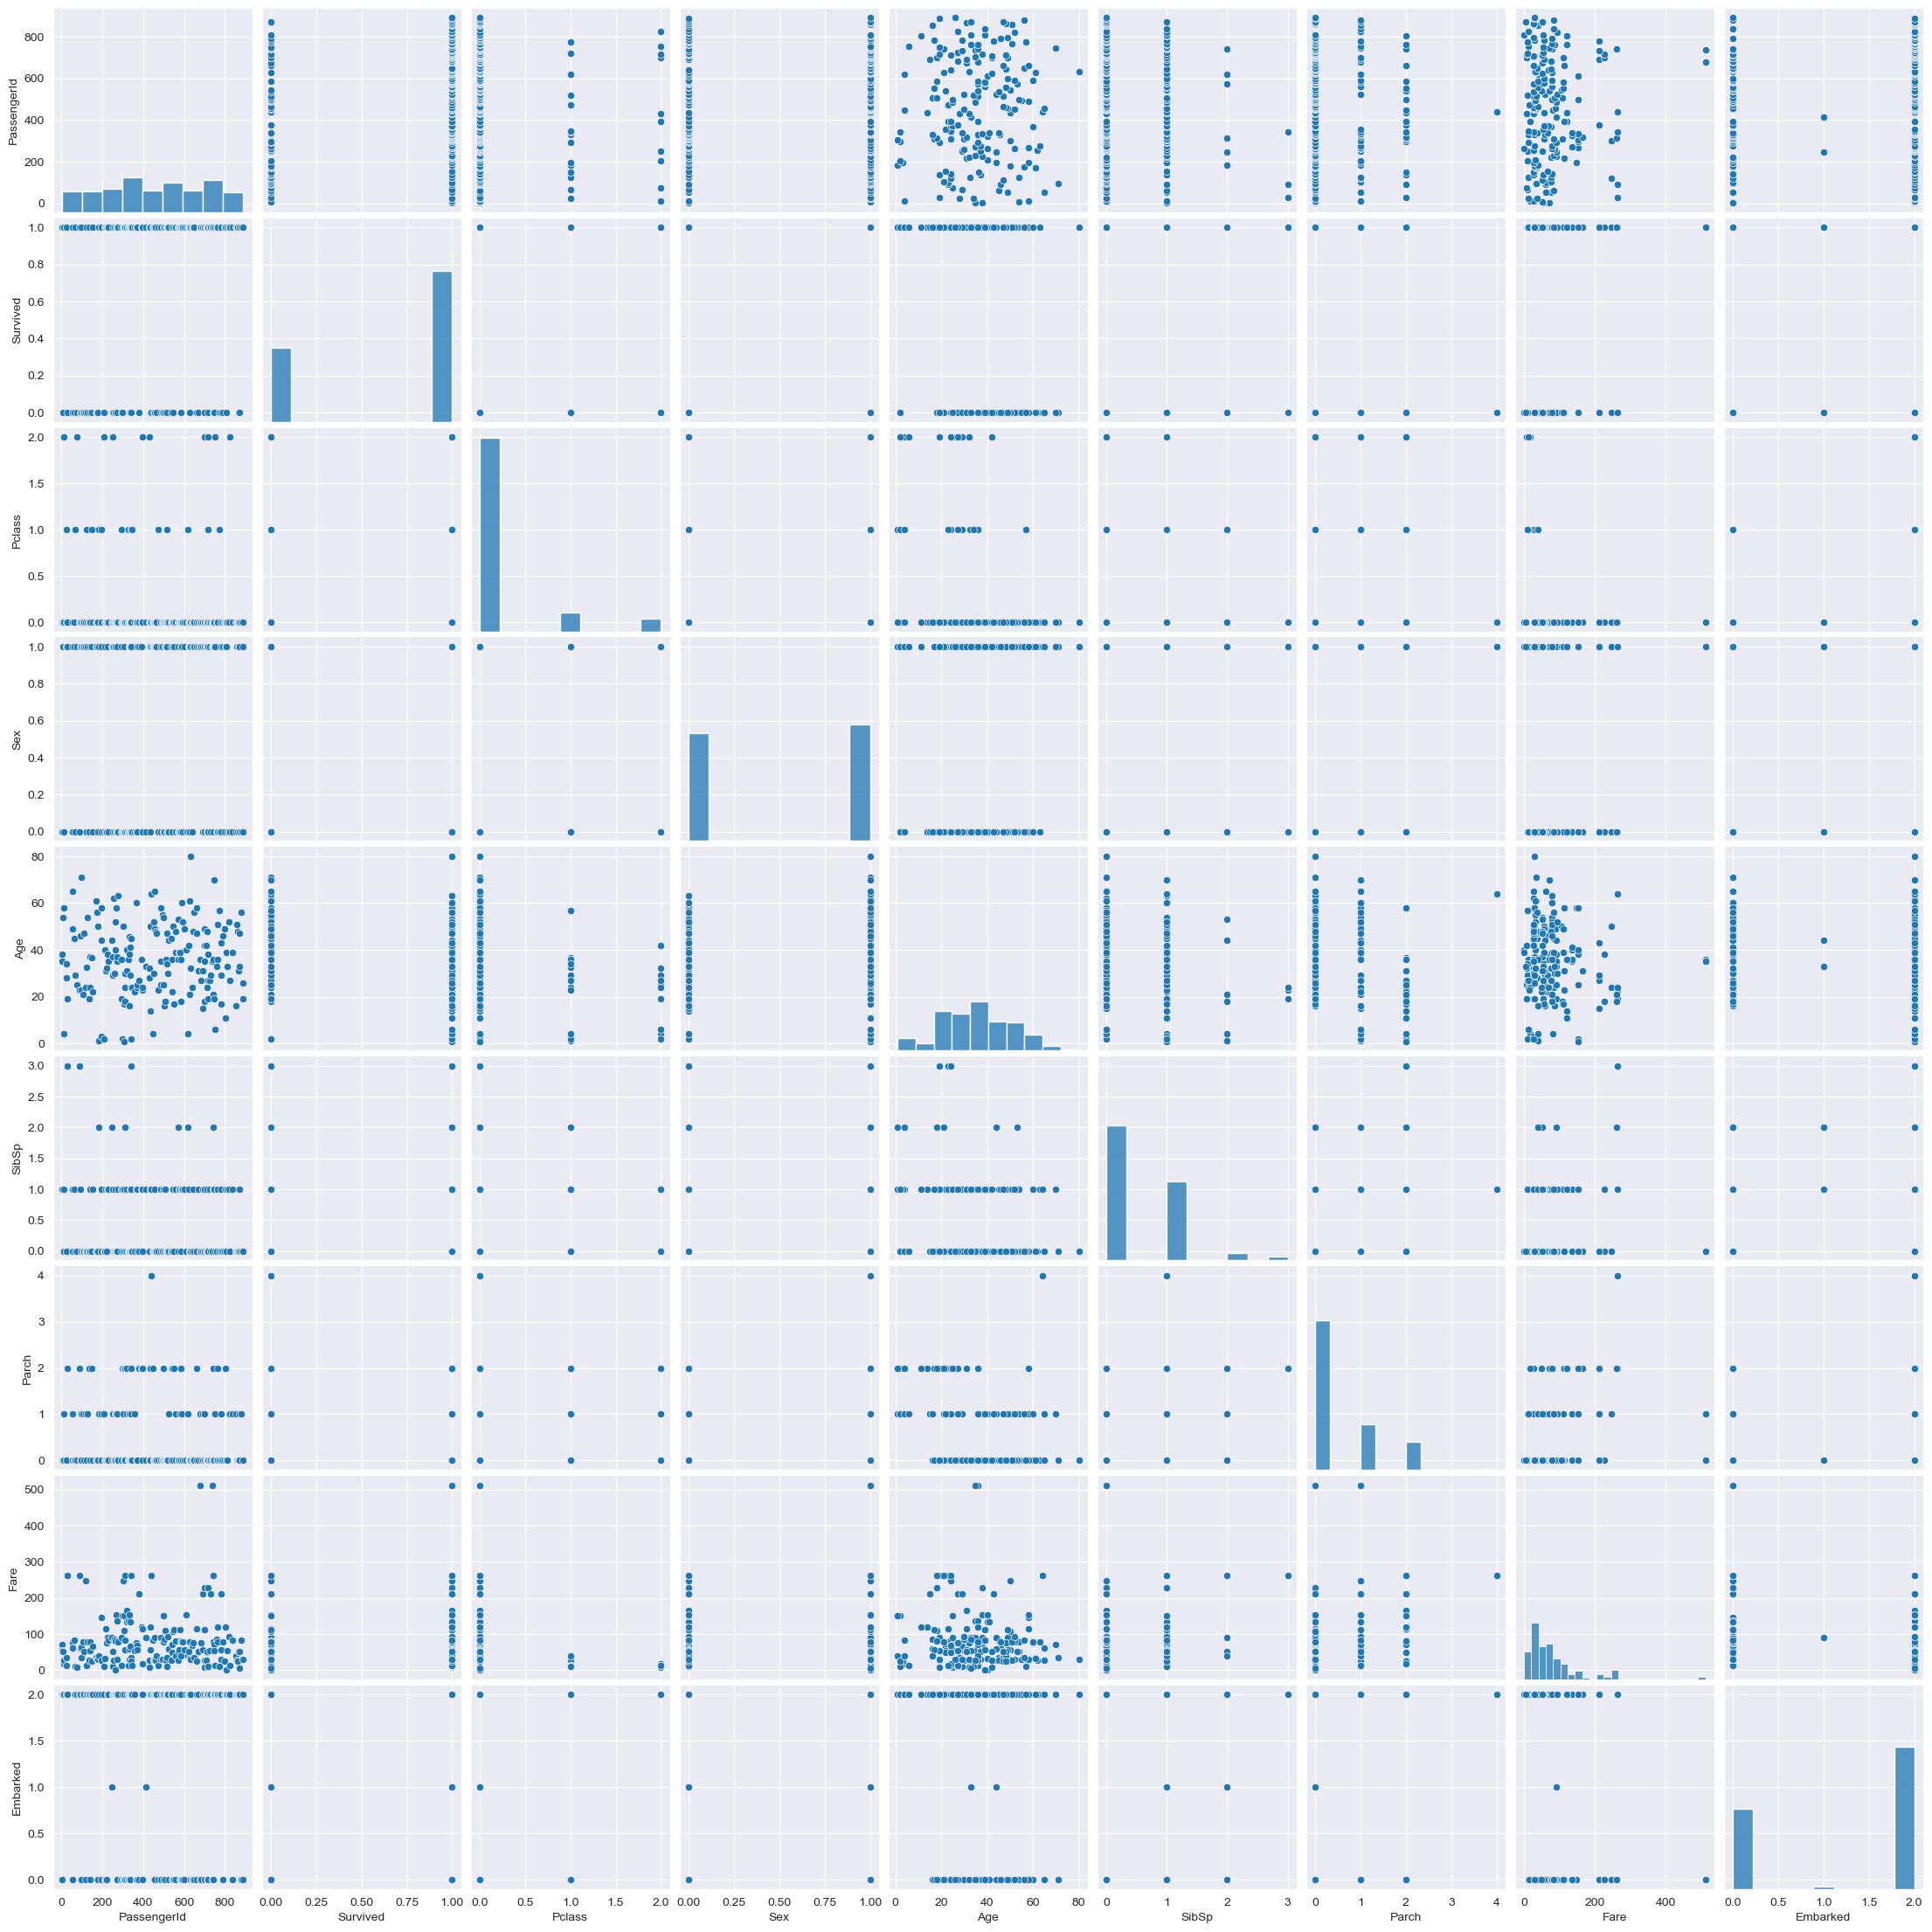

In [82]:
# 3. Relaciones entre atributos
sns.pairplot(df_cleaned)
plt.show()

Realmente no hay ningun atributo que tenga mucha relación con otro, el unico que puede tener un poco mas de relación es el que relaciona Age con Fare,aun asi tampoco podemos sacar conclusiones muy concretas de este grafico.

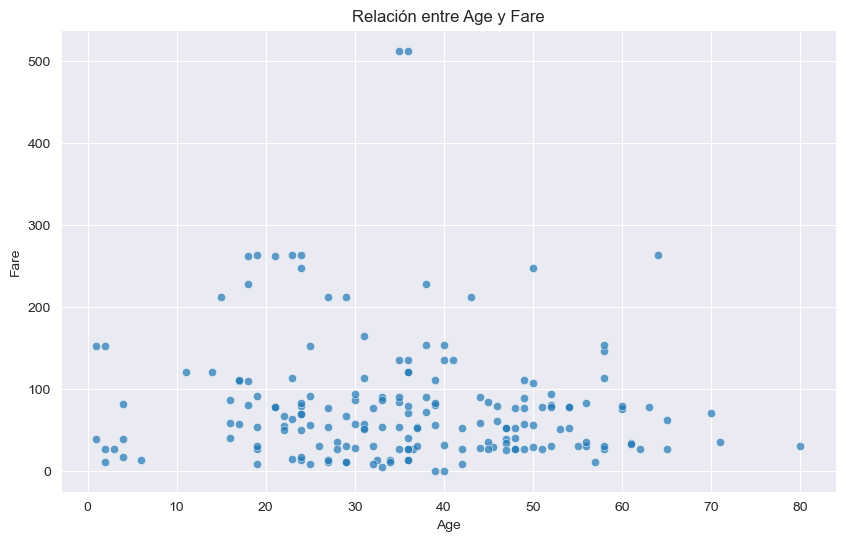

In [6]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='Fare', alpha=0.7)
plt.title('Relación entre Age y Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()



## 4

In [7]:
# 4. Atributos numéricos
num_attrs = ['Age', 'SibSp', 'Parch', 'Fare']
desc_stats = df_cleaned[num_attrs].describe()
print(desc_stats)

              Age       SibSp       Parch        Fare
count  183.000000  183.000000  183.000000  183.000000
mean    35.674426    0.464481    0.475410   78.682469
std     15.643866    0.644159    0.754617   76.347843
min      0.920000    0.000000    0.000000    0.000000
25%     24.000000    0.000000    0.000000   29.700000
50%     36.000000    0.000000    0.000000   57.000000
75%     47.500000    1.000000    1.000000   90.000000
max     80.000000    3.000000    4.000000  512.329200


Age: Media de 35.67 años, con alta dispersión (std = 15.64), rango de 0.92 (1 año) a 80 años.

SibSp: Media baja (0.46), mayoría con 0 o 1 hermano/cónyuge (percentiles bajos).

Parch: Similar a SibSp, media de 0.48, mayoría sin padres/hijos.

Fare: Muy dispersa (std = 76.35), con tarifas desde 0 hasta 512.33, indicando diferencias económicas grandes.





## 5


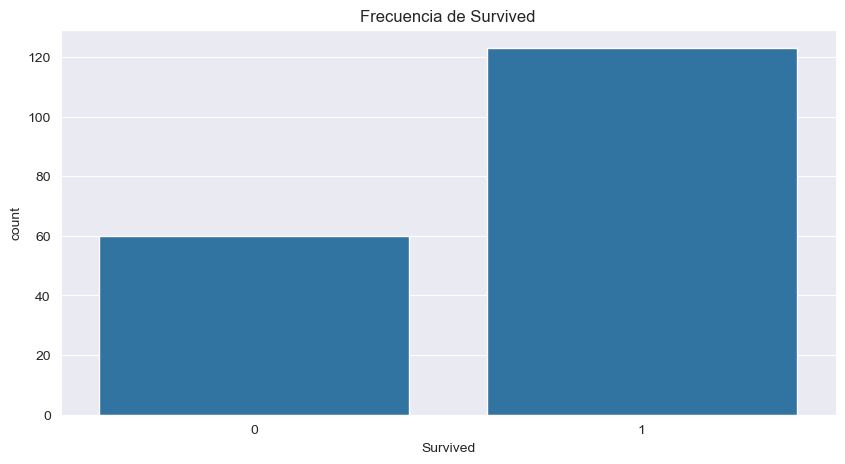

Survived:
Valores distintos: 2
Valor más frecuente: 1


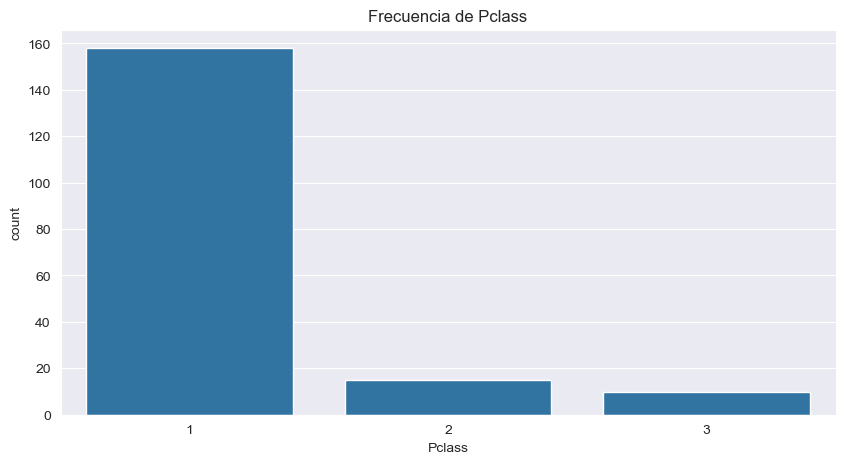

Pclass:
Valores distintos: 3
Valor más frecuente: 1


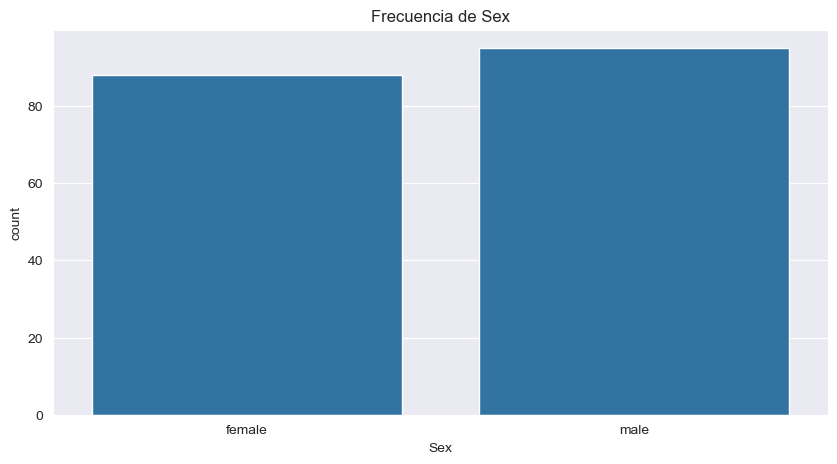

Sex:
Valores distintos: 2
Valor más frecuente: male


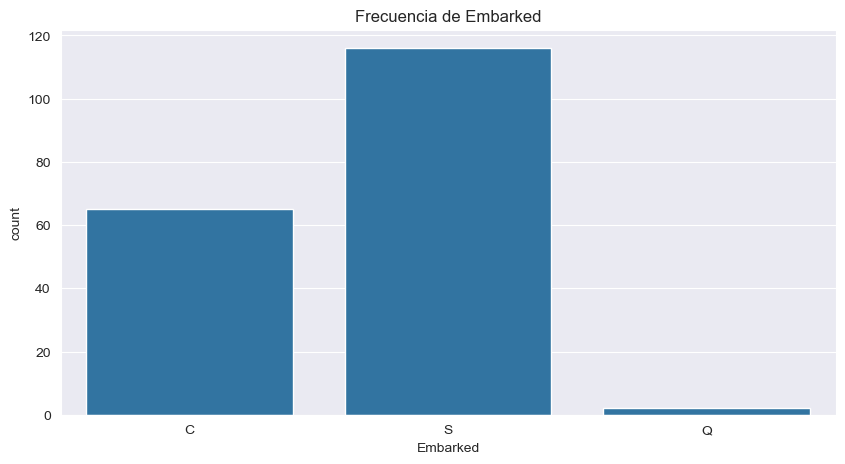

Embarked:
Valores distintos: 3
Valor más frecuente: S


In [8]:
# 5. Atributos categóricos
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=column)
    plt.title(f'Frecuencia de {column}')
    plt.show()
    print(f'{column}:')
    print(f'Valores distintos: {df_cleaned[column].nunique()}')
    print(f'Valor más frecuente: {df_cleaned[column].mode()[0]}')

Survived: Desbalanceado si hay más 1 que 0.

Pclass: Desbalanceado hacia 1.

Sex: Desbalanceado hacia male, pero es el que mas equilibrio tiene.

Embarked: Desbalanceado hacia S.

## 6

Age tiene 0 outliers.


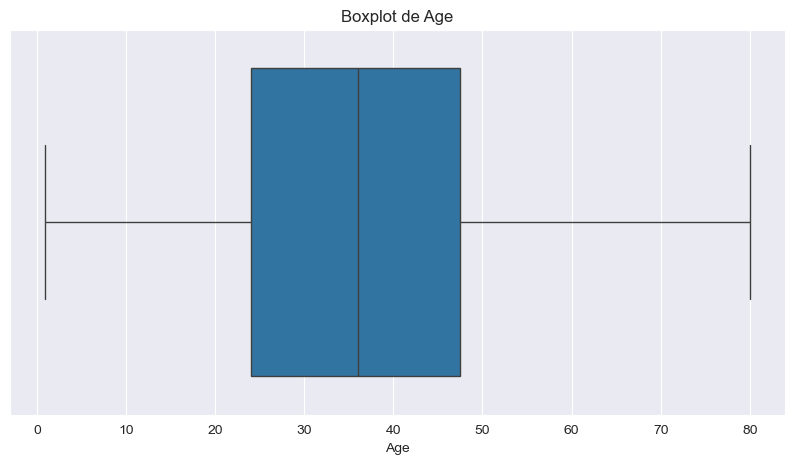

Fare tiene 12 outliers.


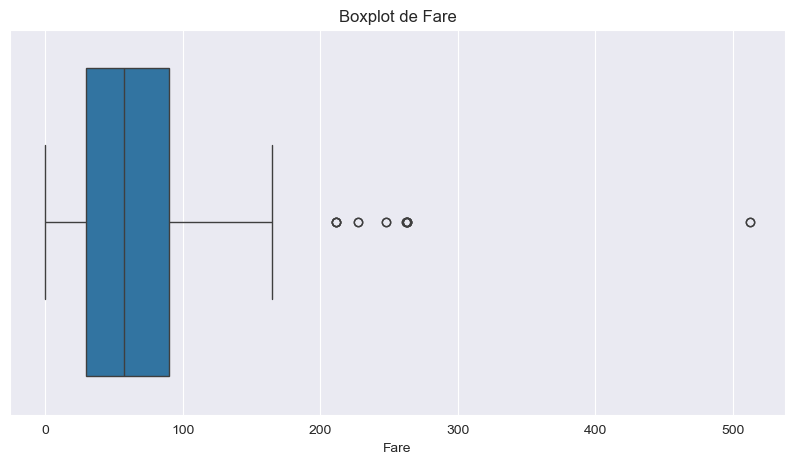

SibSp tiene 3 outliers.


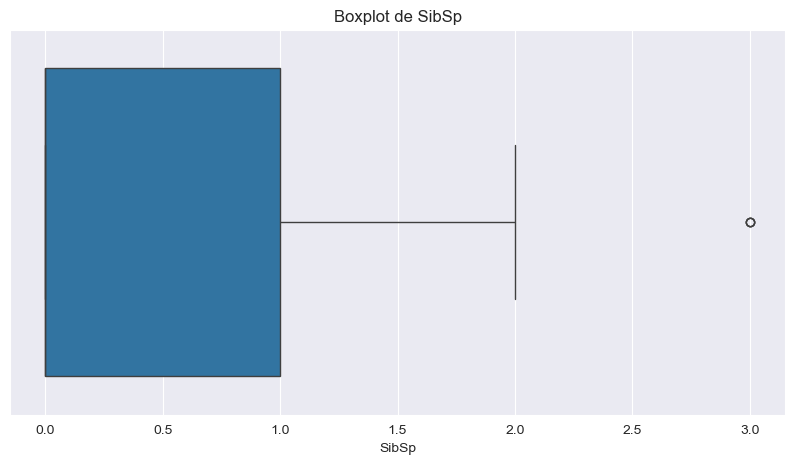

Parch tiene 1 outliers.


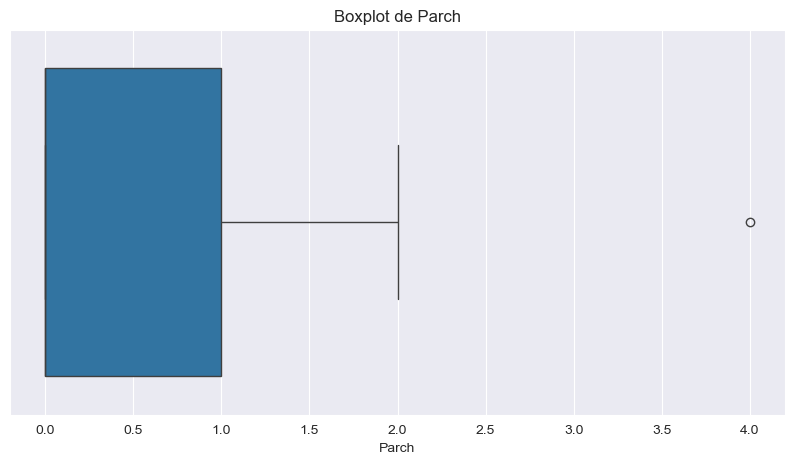

In [9]:
# 6. Determinar outliers
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
for column in numerical_columns:
    # Cálculo numérico de los outliers
    q1, q3 = df_cleaned[column].quantile([0.25, 0.75]) # Sacamos los quartiles 1 y 3
    IQR = q3 - q1 # Calculamos el rango entre quartiles (IQR)
    lowest_inlier = q1 - 1.5 * q1 # Usamos la fórmula para sacar el mínimo valor no-outlier
    highest_inlier = q3 + 1.5 * q3 # Y hacemos lo mismo para el máximo valor no-outlier
    # Contamos la cantidad de elementos que no estan en el rango y lo mostramos por pantalla
    outliers = 0 
    outliers += df_cleaned[column][df_cleaned[column] < lowest_inlier].count()
    outliers += df_cleaned[column][df_cleaned[column] > highest_inlier].count()
    print(f'{column} tiene {outliers} outliers.')
    # Representación en BoxPlot: Los círculos son los outliers
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f'Boxplot de {column}')
    plt.show()

## 7

In [22]:
# 7. Convertir atributos categóricos en valores numéricos
df_onehot = pd.get_dummies(df_cleaned, columns=categorical_columns)

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le


In [19]:
# Mostramos los resultados del get_dummy
df_onehot.head()

PassengerId                                               Name   Age  \
0            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
1            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
2            7                            McCarthy, Mr. Timothy J  54.0   
3           11                    Sandstrom, Miss. Marguerite Rut   4.0   
4           12                           Bonnell, Miss. Elizabeth  58.0   

   SibSp  Parch    Ticket     Fare Cabin  Survived_0  Survived_1  Pclass_0  \
0      1      0  PC 17599  71.2833   C85       False        True      True   
1      1      0    113803  53.1000  C123       False        True      True   
2      0      0     17463  51.8625   E46        True       False      True   
3      1      1   PP 9549  16.7000    G6       False        True     False   
4      0      0    113783  26.5500  C103       False        True      True   

   Pclass_1  Pclass_2  Sex_0  Sex_1  Embarked_0  Embarked_1  Embarked_2  
0     False     False   True  False        True       False       False  
1     False     False   True  False       False       False        True  
2     False     False  False   True       False       False        True  
3     False      True   True  False       False       False        True  
4     False     False   True  False       False       False        True

crea columnas binarias como sex_0 y sex_1, evitando asumir orden

In [20]:
# Mostramos los resultados del label_encoder
df_cleaned.head()

PassengerId  Survived  Pclass  \
0            2         1       0   
1            4         1       0   
2            7         0       0   
3           11         1       2   
4           12         1       0   

                                                Name  Sex   Age  SibSp  Parch  \
0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
2                            McCarthy, Mr. Timothy J    1  54.0      0      0   
3                    Sandstrom, Miss. Marguerite Rut    0   4.0      1      1   
4                           Bonnell, Miss. Elizabeth    0  58.0      0      0   

     Ticket     Fare Cabin  Embarked  
0  PC 17599  71.2833   C85         0  
1    113803  53.1000  C123         2  
2     17463  51.8625   E46         2  
3   PP 9549  16.7000    G6         2  
4    113783  26.5500  C103         2

Asigna números ( male=0, female=1), asumiendo orden implícito.

### Mejor opción:
 OneHotEncoder es preferible para atributos nominales (Sex, Embarked) en modelos de IA.

## 8


In [43]:
# 8. Normalizar y estandarizar el dataset
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [44]:
# MinMaxScaler
df_numeric = df_cleaned.select_dtypes(include='number')
df_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(df_numeric),
    columns=df_numeric.columns
)

In [47]:
# StandardScaler
df_standardized = pd.DataFrame(
    scaler_standard.fit_transform(df_numeric),
    columns=df_numeric.columns
)

In [67]:
# Mostrar resultados
print("Normalización (MinMaxScaler):")
print(df_normalized.head())

Normalización (MinMaxScaler):
   PassengerId  Survived  Pclass  Sex       Age     SibSp  Parch      Fare  \
0     0.000000       1.0     0.0  0.0  0.468892  0.333333   0.00  0.139136   
1     0.002252       1.0     0.0  0.0  0.430956  0.333333   0.00  0.103644   
2     0.005631       0.0     0.0  1.0  0.671219  0.000000   0.00  0.101229   
3     0.010135       1.0     1.0  0.0  0.038948  0.333333   0.25  0.032596   
4     0.011261       1.0     0.0  0.0  0.721801  0.000000   0.00  0.051822   

   Embarked  
0       0.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


In [48]:
print("\nEstandarización (StandardScaler):")
print(df_standardized.head())


Estandarización (StandardScaler):
   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.840135  0.698430 -0.372256 -1.039012  0.149065  0.833628 -0.631730   
1    -1.832017  0.698430 -0.372256 -1.039012 -0.043230  0.833628 -0.631730   
2    -1.819841 -1.431782 -0.372256  0.962453  1.174636 -0.723044 -0.631730   
3    -1.803606  0.698430  3.520480 -1.039012 -2.030273  0.833628  0.697081   
4    -1.799547  0.698430 -0.372256 -1.039012  1.431029 -0.723044 -0.631730   

       Fare  Embarked  
0 -0.097180 -1.339397  
1 -0.335997  0.755557  
2 -0.352250  0.755557  
3 -0.814070  0.755557  
4 -0.684702  0.755557  


Normalización: Escala datos entre 0 y 1 (e.g., Fare de 0-512 a 0-1).

Estandarización: Centra en media 0 y std 1 (e.g., Age de 35.67±14.52 a 0±1).

La estandarización es mejor para modelos de machine learning (e.g., SVM, redes neuronales) que asumen datos centrados, mientras que la normalización es útil para algoritmos sensibles a rangos (e.g., KNN).